In [255]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 30}


plt.rc('font', **font)

In [250]:
country = pd.read_csv("../dataset/country.csv")
league = pd.read_csv("../dataset/league.csv")
match = pd.read_csv("../dataset/match.csv")
player = pd.read_csv("../dataset/player.csv")
player_attributes = pd.read_csv("../dataset/player_attributes.csv")
team = pd.read_csv("../dataset/team.csv", encoding = "ISO-8859-1")
team_attributes = pd.read_csv("../dataset/team_attributes.csv")

In [251]:
team_attributes

,team_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,9930,2/22/10 0:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,9930,9/19/14 0:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,9930,9/10/15 0:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,8485,2/22/10 0:00,70,Fast,NaN,Little,70,Long,Organised,70,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,8485,2/22/11 0:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,10000,2/22/11 0:00,52,Balanced,NaN,Little,52,Mixed,Organised,52,...,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,10000,2/22/12 0:00,54,Balanced,NaN,Little,51,Mixed,Organised,47,...,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,10000,9/20/13 0:00,54,Balanced,NaN,Little,51,Mixed,Organised,47,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,10000,9/19/14 0:00,54,Balanced,42.0,Normal,51,Mixed,Organised,47,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


In [252]:
homedogswin = pd.read_csv("../groupscores/homedogswin.csv", index_col = 0)
awaydogswin = pd.read_csv("../groupscores/awaydogswin.csv", index_col = 0 )
match1 = pd.read_csv("../groupscores/match1.csv", index_col = 0)


In [253]:
homedogswin

,wins,games,dogscore
home_team_id,,,
1773,3,11,0.272727
2033,1,24,0.041667
4049,2,8,0.250000
4087,2,14,0.142857
6269,2,6,0.333333
...,...,...,...
10281,4,12,0.333333
108893,1,13,0.076923
158085,2,12,0.166667


# which are the teams with the highest dog score


In [202]:
# find dog teams with score > 0.4, much higher than predicted probability (<1/3.5)
benchmark = .4
high_dog_home = homedogswin.sort_values(by = "dogscore", ascending = False)[homedogswin.dogscore >= benchmark]
high_dog_away = awaydogswin.sort_values(by = "dogscore", ascending = False)[awaydogswin.dogscore >= benchmark]

D:\softwares\anaconda\envs\data science\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
D:\softwares\anaconda\envs\data science\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [203]:
team_names_home = high_dog_home.index
team_names_away = high_dog_away.index
team_names = team_names_home.append(team_names_away).drop_duplicates()
team_names

Int64Index([  9748,   8548,   8573,   8586,   8295,   8650,   6391,  10229,
              8560,   9875,   8636,   8203,   8668,   9873, 274581,   9905,
              9790,   8398,   8635,   9925,   8593,   8262,   8640],
           dtype='int64')

# Analyse attributes of these teams

In [204]:
attributes = team_attributes[team_attributes.team_id.isin(team_names)]
attributes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 33 to 1318
Data columns (total 23 columns):
team_id                           118 non-null int64
date                              118 non-null object
buildUpPlaySpeed                  118 non-null int64
buildUpPlaySpeedClass             118 non-null object
buildUpPlayDribbling              42 non-null float64
buildUpPlayDribblingClass         118 non-null object
buildUpPlayPassing                118 non-null int64
buildUpPlayPassingClass           118 non-null object
buildUpPlayPositioningClass       118 non-null object
chanceCreationPassing             118 non-null int64
chanceCreationPassingClass        118 non-null object
chanceCreationCrossing            118 non-null int64
chanceCreationCrossingClass       118 non-null object
chanceCreationShooting            118 non-null int64
chanceCreationShootingClass       118 non-null object
chanceCreationPositioningClass    118 non-null object
defencePressure                   1

In [205]:
team_attributes["is_high_dog"]= attributes.team_id.isin(team_names)

In [206]:
num_col = ['buildUpPlaySpeed', 
       'buildUpPlayPassing', 'chanceCreationPassing', 'chanceCreationCrossing',
       'chanceCreationShooting', 'defencePressure', 'defenceAggression',
       'defenceTeamWidth']
cat_col = ['buildUpPlaySpeedClass','buildUpPlayDribblingClass','buildUpPlayPassingClass','buildUpPlayPositioningClass','chanceCreationPassingClass',
           'chanceCreationCrossingClass', 'chanceCreationShootingClass' ,'chanceCreationPositioningClass', 'defencePressureClass', 
           'defenceAggressionClass', 'defenceTeamWidthClass', 'defenceDefenderLineClass']

## Numerical features

In [207]:
high_num_mean = []
all_num_mean = []
for i in num_col:
    high_num_mean.append(attributes[i].mean())
    all_num_mean.append(team_attributes[i].mean())
num_mean = pd.DataFrame(num_col, columns = ["attributes"])
num_mean["high_dog_mean"] = high_num_mean
num_mean["all_mean"] = all_num_mean
num_mean

,attributes,high_dog_mean,all_mean
0,buildUpPlaySpeed,53.093220,52.462277
1,buildUpPlayPassing,47.118644,48.490398
2,chanceCreationPassing,52.864407,52.165295
3,chanceCreationCrossing,55.813559,53.731824
4,chanceCreationShooting,56.694915,53.969136
5,defencePressure,49.610169,46.017147
6,defenceAggression,52.135593,49.251029
7,defenceTeamWidth,53.483051,52.185871


Finding: Dogs are likely to have higher buildUpPlayDribbling, chanceCreationCrossing, chanceCreationShooting, defencePressure, defenceAggression, defenceTeamWidth 
Can possibly undertake hypothesis testing on these.

In [208]:
num_features_all = pd.melt(team_attributes[num_col])
num_features_highdogs = pd.melt(attributes[num_col])
df = pd.concat([num_features_all, num_features_highdogs],keys = ["all","high-dogs"])
df = df.reset_index()
df = df.drop(["level_1"], axis =1)
df = df.rename({"level_0": "category"}, axis =1)

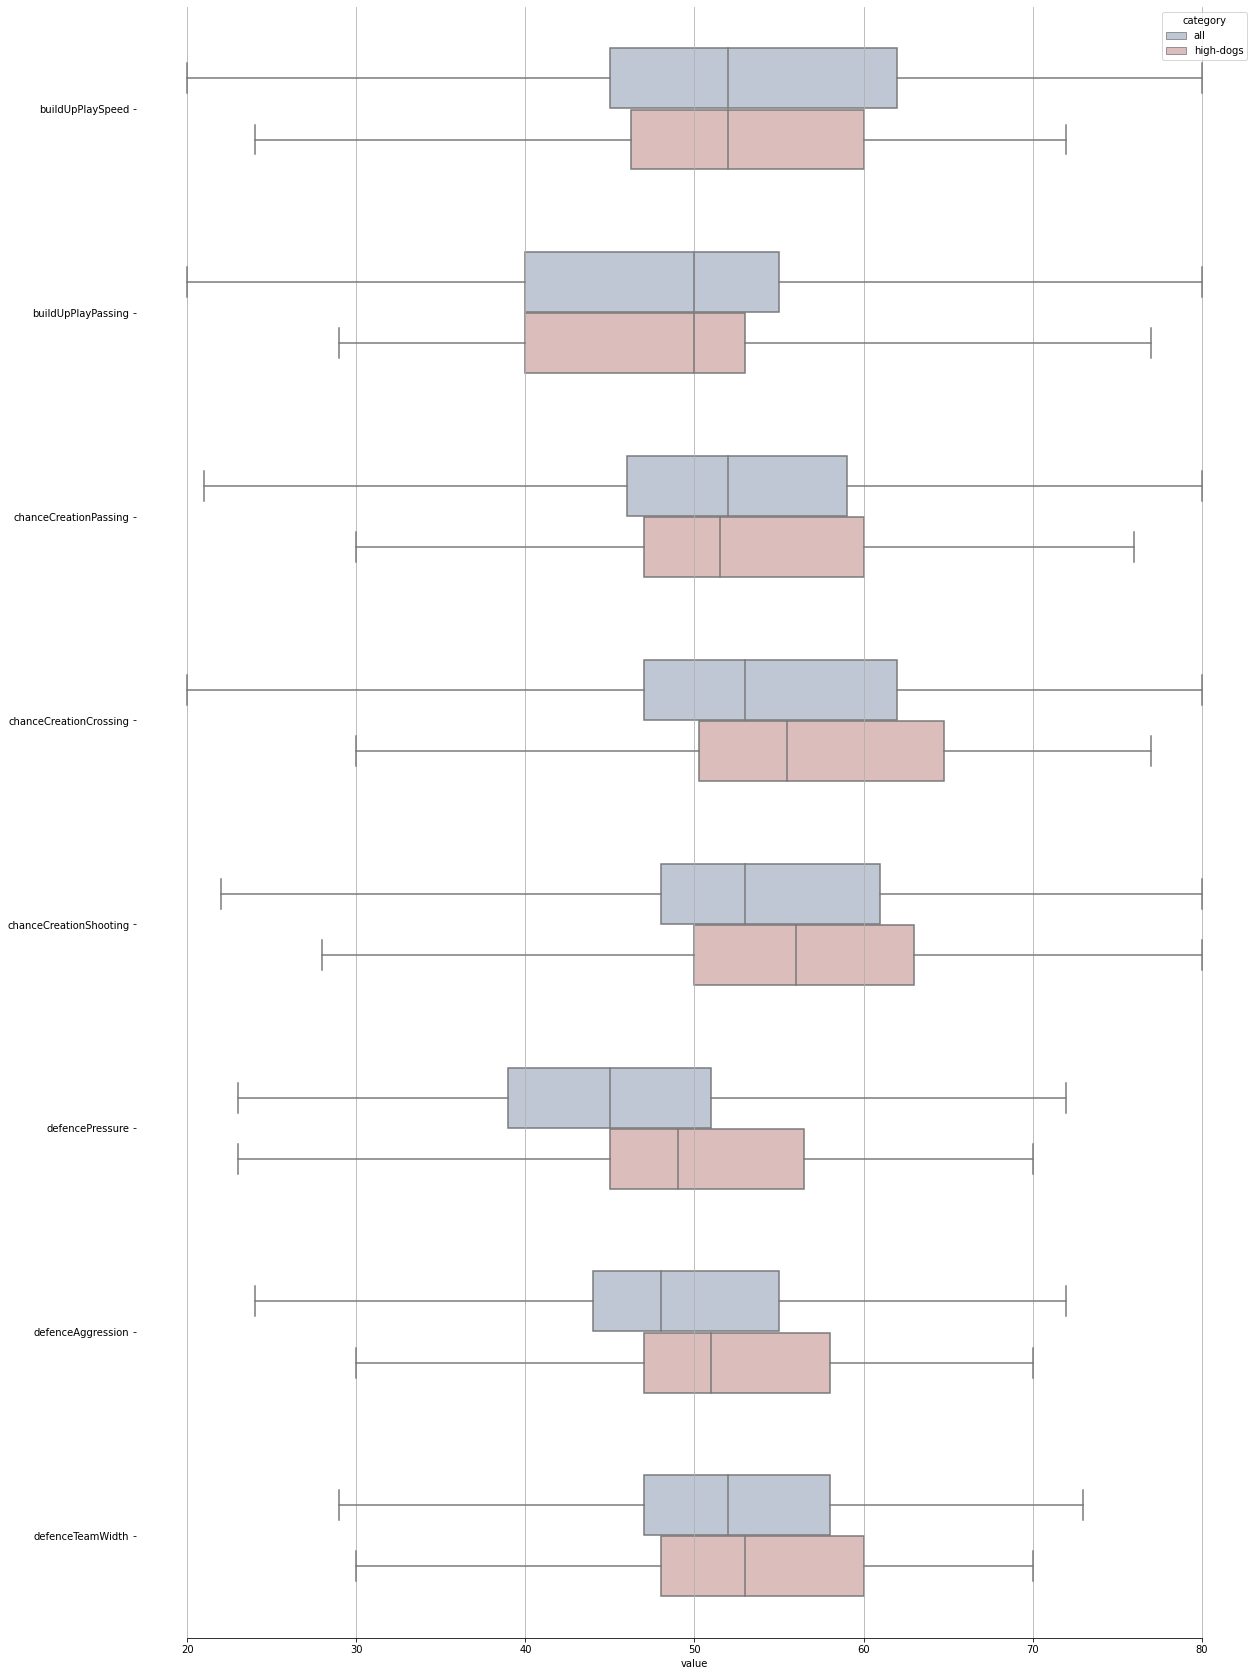

In [209]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(20, 30))

# Plot the orbital period with horizontal boxes
sns.boxplot(y="variable", x="value", hue = "category", data = df,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
# sns.stripplot(x="variable", y="value", data=df,
#              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

## Categorical features

In [213]:
cat_col

['buildUpPlaySpeedClass',
 'buildUpPlayDribblingClass',
 'buildUpPlayPassingClass',
 'buildUpPlayPositioningClass',
 'chanceCreationPassingClass',
 'chanceCreationCrossingClass',
 'chanceCreationShootingClass',
 'chanceCreationPositioningClass',
 'defencePressureClass',
 'defenceAggressionClass',
 'defenceTeamWidthClass',
 'defenceDefenderLineClass']

In [230]:
cat_list = []
for i in cat_col:
    cat_list.append(team_attributes[i].unique().tolist())
cat_list


[['Balanced', 'Fast', 'Slow'],
 ['Little', 'Normal', 'Lots'],
 ['Mixed', 'Long', 'Short'],
 ['Organised', 'Free Form'],
 ['Normal', 'Risky', 'Safe'],
 ['Normal', 'Lots', 'Little'],
 ['Normal', 'Lots', 'Little'],
 ['Organised', 'Free Form'],
 ['Medium', 'Deep', 'High'],
 ['Press', 'Double', 'Contain'],
 ['Normal', 'Wide', 'Narrow'],
 ['Cover', 'Offside Trap']]

In [238]:
# put ordinal categorical variables in order
cats = [['Slow', 'Balanced', 'Fast'],
 ['Little', 'Normal', 'Lots'],
 ['Short', 'Mixed', 'Long'],
 ['Free Form', 'Organised'],
 ['Safe','Normal', 'Risky' ],
 ['Little','Normal', 'Lots'],
 ['Little','Normal', 'Lots'],
 ['Free Form','Organised'],
 ['Deep', 'Medium', 'High'],
 ['Contain', 'Press', 'Double'],
 ['Narrow', 'Normal', 'Wide'],
 ['Cover', 'Offside Trap']]


high_cat_mean = []
all_cat_mean = []

for i in range(len(cat_col)):
    col = cat_col[i]
    
    cat = pd.Categorical(attributes[col], categories = cats[i], ordered = True)
    labels, unique = pd.factorize(cat, sort = True)
    attributes[col] = labels
    
    cat = pd.Categorical(team_attributes[col], categories = cats[i], ordered = True)
    labels, unique = pd.factorize(cat, sort = True)
    team_attributes[col] = labels
    
    mean1 = attributes[col].mean()
    mean2 = team_attributes[col].mean()
    high_cat_mean.append(mean1)
    all_cat_mean.append(mean2)

cat_mean = pd.DataFrame(cat_col, columns = ["attributes"])
cat_mean["high_dog_mean"] = high_cat_mean
cat_mean["all_mean"] = all_cat_mean
cat_mean

D:\softwares\anaconda\envs\data science\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,attributes,high_dog_mean,all_mean
0,buildUpPlaySpeedClass,1.093220,1.048011
1,buildUpPlayDribblingClass,0.381356,0.325789
2,buildUpPlayPassingClass,0.932203,0.976680
3,buildUpPlayPositioningClass,0.915254,0.950617
4,chanceCreationPassingClass,1.135593,1.078875
5,chanceCreationCrossingClass,1.161017,1.109053
6,chanceCreationShootingClass,1.177966,1.109739
7,chanceCreationPositioningClass,0.915254,0.897805
8,defencePressureClass,0.991525,0.936214
9,defenceAggressionClass,1.016949,1.009602


In [242]:
cat_features_all = team_attributes[cat_col]
cat_features_highdogs = attributes[cat_col]
df = pd.concat([pd.melt(cat_features_all),pd.melt(cat_features_highdogs)],keys = ["all","high-dogs"])
df = df.reset_index()
df = df.drop(["level_1"], axis =1)
df = df.rename({"level_0": "category"}, axis =1)

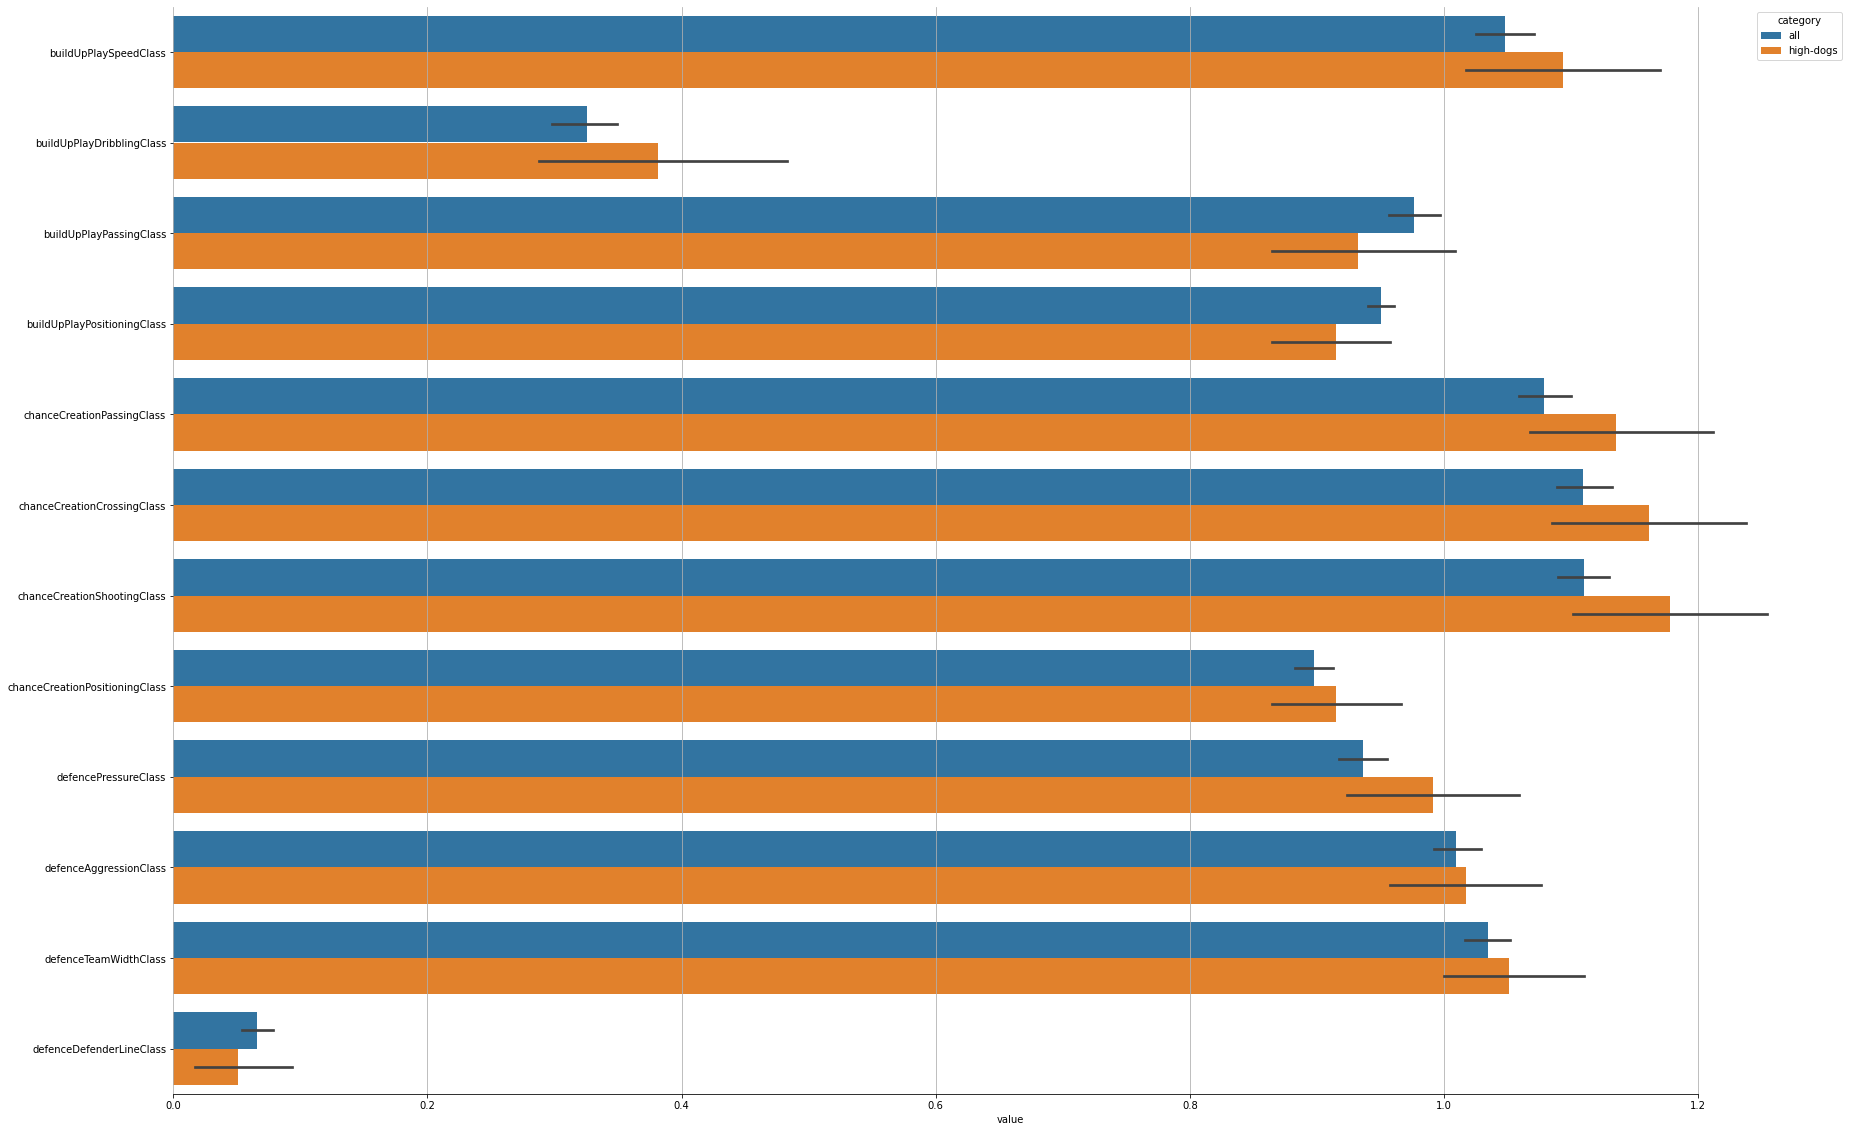

In [243]:
#sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(30, 20))
#ax.set_xscale("log")

# Plot the orbital period with horizontal boxes
sns.barplot(y="variable", x="value", hue = "category", data = df)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

Analysis of categorical features probably does not provide much additional values...